#### Source:
@inproceedings{misra2018decomposing,
  title={Decomposing fit semantics for product size recommendation in metric spaces},
  author={Misra, Rishabh and Wan, Mengting and McAuley, Julian},
  booktitle={Proceedings of the 12th ACM Conference on Recommender Systems},
  pages={422--426},
  year={2018},
  organization={ACM}
}

@book{book,
author = {Misra, Rishabh and Grover, Jigyasa},
year = {2021},
month = {01},
pages = {},
title = {Sculpting Data for ML: The first act of Machine Learning},
isbn = {978-0-578-83125-1}
}

rishabhmisra.github.io/publications 

Data: https://www.kaggle.com/rmisra/clothing-fit-dataset-for-size-recommendation/home

In [555]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [556]:
clothes_df = pd.read_json('renttherunway_final_data.json', lines=True)

In [557]:
clothes_df.drop(columns=['review_date', 'item_id', 'user_id', 'review_text', 'review_summary', 'rented for'], axis=1, inplace=True)
clothes_df = clothes_df[(clothes_df['category'] == 'dress')]
clothes_df.drop(columns='category', axis=1, inplace=True)

In [558]:
clothes_df.reset_index().head()

,index,fit,bust size,weight,rating,body type,height,size,age
0,3,fit,34c,135lbs,8.0,pear,"5' 5""",8,34.0
1,5,fit,32b,138lbs,8.0,athletic,"5' 8""",8,45.0
2,6,fit,34c,112lbs,10.0,hourglass,"5' 3""",4,27.0
3,7,fit,34d+,118lbs,10.0,full bust,"5' 3""",8,65.0
4,10,small,34b,135lbs,8.0,athletic,"5' 3""",12,33.0


In [559]:
clothes_df['fit'].value_counts()

fit      66567
small    13686
large    12631
Name: fit, dtype: int64

In [560]:
clothes_df['fitting'] = clothes_df['fit'].replace({'fit': 'fit', 'small': 'not fit', 'large': 'not fit'})
clothes_df.drop(columns='fit', axis=1, inplace=True)

In [561]:
clothes_df['fitting'].value_counts()

fit        66567
not fit    26317
Name: fitting, dtype: int64

In [562]:
for i in clothes_df.columns:
    missing = clothes_df[i].isnull().sum()*100/clothes_df[i].isnull().count()
    print({'missing': float(missing), 'column': i})

{'missing': 9.570001291934025, 'column': 'bust size'}
{'missing': 15.652857327419147, 'column': 'weight'}
{'missing': 0.036604797381680376, 'column': 'rating'}
{'missing': 7.668705051462038, 'column': 'body type'}
{'missing': 0.3369794582489988, 'column': 'height'}
{'missing': 0.0, 'column': 'size'}
{'missing': 0.4284914517031997, 'column': 'age'}
{'missing': 0.0, 'column': 'fitting'}


In [563]:
for i in clothes_df.columns:
    print(i)
    print(clothes_df[i].unique())
    print('\n')

bust size
['34c' '32b' '34d+' '34b' '36d' '34d' '32d+' '32c' '32dd' '32d' '36b'
 '36c' '32a' nan '34ddd/e' '38d+' '36a' '38d' '34a' '38dd' '36ddd/e'
 '42dd' '36dd' '28f' '38c' '36d+' '34dd' '40d' '38a' '32ddd/e' '42d'
 '34aa' '32aa' '38b' '28c' '36f' '34g' '32f' '40c' '30d' '28g' '30dd'
 '36g' '38f' '30a' '30ddd/e' '44dd' '30g' '38h' '34j' '34f' '38ddd/e'
 '32g' '40ddd/e' '32h' '30c' '44d' '38g' '40g' '28b' '34h' '28a' '30b'
 '40f' '28dd' '36h' '28ddd/e' '30f' '40dd' '44ddd/e' '30i' '32j' '36j'
 '40h' '40b' '36aa' '48d' '38i' '30h' '32i' '42ddd/e' '42c' '28aa' '28d'
 '36i' '42b' '46ddd/e' '44c' '42f' '38aa' '44f' '30aa' '46f' '42g' '34i'
 '44b' '44g' '48dd' '46c' '40i']


weight
['135lbs' '138lbs' '112lbs' '118lbs' '142lbs' '170lbs' '143lbs' '115lbs'
 '145lbs' '140lbs' '120lbs' nan '130lbs' '155lbs' '150lbs' '136lbs'
 '174lbs' '125lbs' '110lbs' '128lbs' '160lbs' '250lbs' '231lbs' '175lbs'
 '126lbs' '210lbs' '165lbs' '215lbs' '180lbs' '163lbs' '106lbs' '178lbs'
 '108lbs' '92lbs' '132lbs

In [564]:
clothes_df.head()

,bust size,weight,rating,body type,height,size,age,fitting
3,34c,135lbs,8.0,pear,"5' 5""",8,34.0,fit
5,32b,138lbs,8.0,athletic,"5' 8""",8,45.0,fit
6,34c,112lbs,10.0,hourglass,"5' 3""",4,27.0,fit
7,34d+,118lbs,10.0,full bust,"5' 3""",8,65.0,fit
10,34b,135lbs,8.0,athletic,"5' 3""",12,33.0,not fit


In [565]:
for i in clothes_df.select_dtypes(include=['O']):
    print(i)
    print(clothes_df[i].value_counts())
    print('\n')

bust size
34b        12968
34c        11230
34d         8843
36c         6513
36d         5481
           ...  
48dd           1
44g            1
46f            1
46ddd/e        1
36j            1
Name: bust size, Length: 99, dtype: int64


weight
130lbs    6855
135lbs    6541
125lbs    6308
140lbs    6036
120lbs    5078
          ... 
88lbs        1
273lbs       1
221lbs       1
87lbs        1
242lbs       1
Name: weight, Length: 173, dtype: int64


body type
hourglass            26714
athletic             20606
pear                 11059
petite               10939
full bust             7348
straight & narrow     6678
apple                 2417
Name: body type, dtype: int64


height
5' 4"     13591
5' 6"     12164
5' 5"     11803
5' 7"     11310
5' 3"     10333
5' 2"      8447
5' 8"      7647
5' 9"      5329
5' 1"      3693
5' 10"     3126
5' 0"      2038
5' 11"     1451
6' 0"       642
4' 11"      544
6' 1"       191
4' 10"      114
6' 2"        61
4' 9"        39
6' 3"        14
4' 

### Removing 'lbs' and converting the 'weight' variable into numeric

In [566]:
#convert height to inches
#remove lbs from weight
clothes_df['weight'] = clothes_df['weight'].astype(str).apply(lambda x: x.replace('nan', '0lbs').split('l')[0]).astype(int)
clothes_df.head()

,bust size,weight,rating,body type,height,size,age,fitting
3,34c,135,8.0,pear,"5' 5""",8,34.0,fit
5,32b,138,8.0,athletic,"5' 8""",8,45.0,fit
6,34c,112,10.0,hourglass,"5' 3""",4,27.0,fit
7,34d+,118,10.0,full bust,"5' 3""",8,65.0,fit
10,34b,135,8.0,athletic,"5' 3""",12,33.0,not fit


In [567]:
#clothes_df['weight'].apply(lambda x: x.split('l'))

In [568]:
clothes_df['weight'].replace(0, round(clothes_df['weight'].mean()), inplace=True)

In [569]:
 clothes_df.dropna(inplace=True)

In [570]:
#nan values in:
#'age', 'height', 'rented for', 'rating', 'bust size'

for i in clothes_df[['age', 'height', 'rating', 'bust size']]:
    clothes_df = clothes_df.drop(clothes_df[clothes_df[i] == 'nan'].index)

### Converting the 'height' variable into centimeters for better usability

In [571]:
clothes_df['height'] = clothes_df['height'].apply(lambda x: x.replace('\"','').split('\''))
clothes_df.head()

,bust size,weight,rating,body type,height,size,age,fitting
3,34c,135,8.0,pear,"[5, 5]",8,34.0,fit
5,32b,138,8.0,athletic,"[5, 8]",8,45.0,fit
6,34c,112,10.0,hourglass,"[5, 3]",4,27.0,fit
7,34d+,118,10.0,full bust,"[5, 3]",8,65.0,fit
10,34b,135,8.0,athletic,"[5, 3]",12,33.0,not fit


In [572]:
clothes_df['feet'] = clothes_df['height'].apply(lambda x: float(x[0]) * 30.48)
clothes_df['inches'] = clothes_df['height'].apply(lambda x: float(x[1]) * 2.54)

In [573]:
clothes_df.head()

,bust size,weight,rating,body type,height,size,age,fitting,feet,inches
3,34c,135,8.0,pear,"[5, 5]",8,34.0,fit,152.4,12.70
5,32b,138,8.0,athletic,"[5, 8]",8,45.0,fit,152.4,20.32
6,34c,112,10.0,hourglass,"[5, 3]",4,27.0,fit,152.4,7.62
7,34d+,118,10.0,full bust,"[5, 3]",8,65.0,fit,152.4,7.62
10,34b,135,8.0,athletic,"[5, 3]",12,33.0,not fit,152.4,7.62


In [574]:
clothes_df['height_cm'] = clothes_df['feet'] + clothes_df['inches']
clothes_df.drop(columns=['height', 'feet', 'inches'], axis=1, inplace=True)

In [575]:

clothes_df['age'] = clothes_df['age'].astype(int)
clothes_df.head()

,bust size,weight,rating,body type,size,age,fitting,height_cm
3,34c,135,8.0,pear,8,34,fit,165.10
5,32b,138,8.0,athletic,8,45,fit,172.72
6,34c,112,10.0,hourglass,4,27,fit,160.02
7,34d+,118,10.0,full bust,8,65,fit,160.02
10,34b,135,8.0,athletic,12,33,not fit,160.02


In [576]:
clothes_df['fitting'].value_counts()

fit        56901
not fit    22576
Name: fitting, dtype: int64

In [577]:
clothes_df.shape

(79477, 8)


## EDA

### Univariate Analysis

In [578]:
clothes_df['age'] = clothes_df['age'].replace(0, np.nan)
clothes_df['age'].fillna(clothes_df['age'].mean(), inplace=True)
clothes_df['age'] = clothes_df['age'].astype(int)

clothes_df['age'].unique()

array([ 34,  45,  27,  65,  33,  30,  29,  35,  26,  28,  21,  20,  32,
        53,  31,  38,  36,  37,  24,  25,  48,  40,  23,  44,  17,  43,
        50,  39,  42,  41,  56,  52,  54,  59,  46,  47,  55,  49,  57,
        22,  60,  19,  58,  15,  62,  51,  70,  16,  69,  66,  18,  64,
        63,  87,  68,  61, 117, 116,  67,   2,  91,  92, 106,  75,  72,
        14,   1,  71,  74,  76,  73,   3])

In [579]:
clothes_df.describe()

,weight,rating,size,age,height_cm
count,79477.000000,79477.000000,79477.000000,79477.000000,79477.000000
mean,134.808737,9.038112,12.007335,33.907206,165.628633
std,21.225765,1.453498,8.042988,7.725137,6.784576
min,50.000000,2.000000,0.000000,1.000000,137.160000
25%,118.000000,8.000000,8.000000,29.000000,160.020000
50%,130.000000,10.000000,12.000000,32.000000,165.100000
75%,145.000000,10.000000,16.000000,37.000000,170.180000
max,285.000000,10.000000,57.000000,117.000000,193.040000


In [580]:
clothes_df['size'] = np.log(clothes_df['size'].replace(0, np.nan))
clothes_df['size'].replace(np.nan, 0, inplace=True)

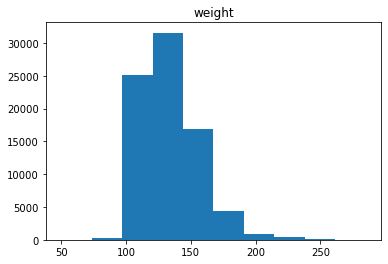

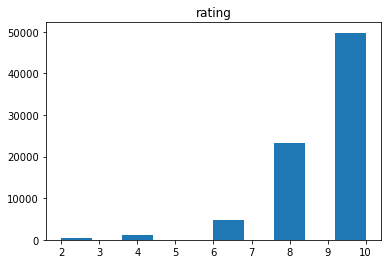

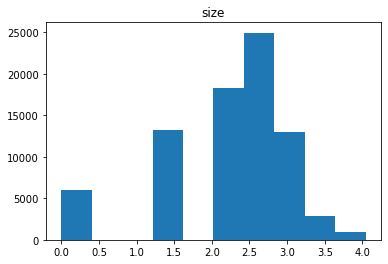

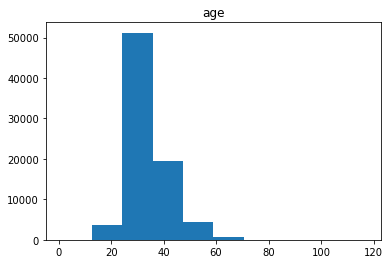

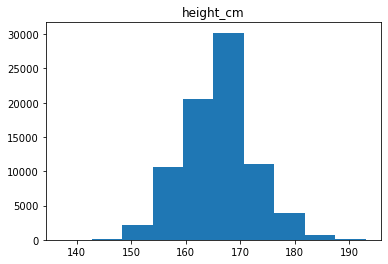

In [581]:
for i in clothes_df.select_dtypes(include='number'):
    plt.hist(clothes_df[i])
    plt.title(i)
    plt.show()

In [582]:
np.where(clothes_df['size'] == 0)

(array([   12,    17,    46, ..., 79449, 79456, 79460], dtype=int64),)

Text(0.5, 1.0, 'horizontal bar chart of fit')

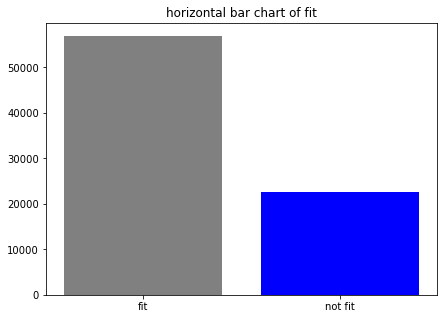

In [583]:
plt.figure(figsize=(7,5))
plt.bar(clothes_df.groupby("fitting")["fitting"].count().index, 
         clothes_df.groupby("fitting")["fitting"].count(), 
         color=["gray","blue"])
plt.title("horizontal bar chart of fit")

In [584]:
'''from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white").generate(" ".join(clothes_df[""]))
plt.figure(figsize=(10,10))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()'''

'from wordcloud import WordCloud\n\nwordcloud = WordCloud(background_color="white").generate(" ".join(clothes_df[""]))\nplt.figure(figsize=(10,10))\n\nplt.imshow(wordcloud, interpolation=\'bilinear\')\nplt.axis("off")\n\nplt.show()'

### Bivariate Analysis

##### Continuous/Continuous

In [585]:
clothes_df.corr()

,weight,rating,size,age,height_cm
weight,1.000000,-0.015818,0.591490,0.043702,0.337471
rating,-0.015818,1.000000,-0.032322,-0.030601,0.003042
size,0.591490,-0.032322,1.000000,0.130274,0.262982
age,0.043702,-0.030601,0.130274,1.000000,-0.018413
height_cm,0.337471,0.003042,0.262982,-0.018413,1.000000


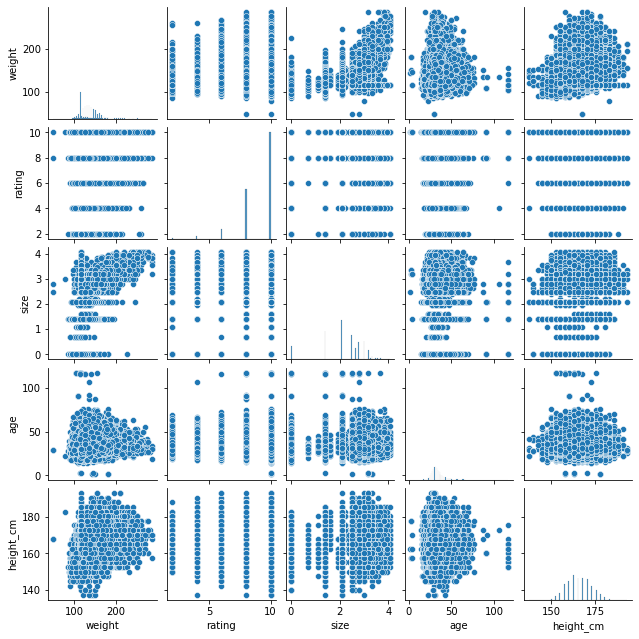

In [586]:
sns.pairplot(data=clothes_df, height=1.8)

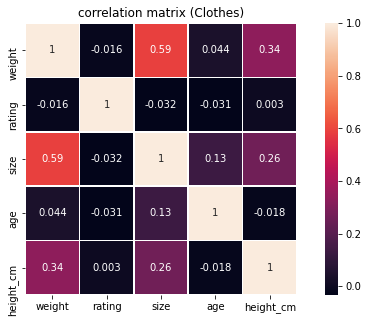

In [587]:
plt.figure(figsize=(10,5))

#plt.subplot(1,2,1)
sns.heatmap(clothes_df.corr(), square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (Clothes)")
plt.show()

size and weight (0.657)

weight and height_cm (0.339)

size and height_cm (0.236)

size and age (0.153)

#### Categorical/Continuous

In [588]:
clothes_df.groupby('fitting').mean()

,weight,rating,size,age,height_cm
fitting,,,,,
fit,134.754609,9.258431,2.193414,33.972426,165.679146
not fit,134.945163,8.482814,2.222162,33.742824,165.501319


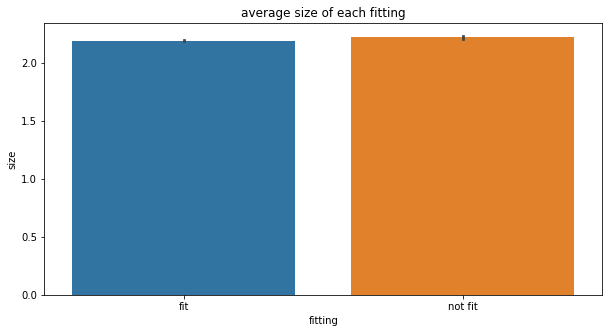

In [589]:
plt.figure(figsize=(10,5))

#plt.subplot(1,3,1)
sns.barplot(x=clothes_df["fitting"], y=clothes_df["size"], data=clothes_df)
plt.title("average size of each fitting")
plt.show()

#### Categorical/Categorical

In [590]:
clothes_df['bust_line'] = clothes_df['bust size'].apply(lambda x: x[:2])
clothes_df['cup_size'] = clothes_df['bust size'].apply(lambda x: x[2:])
clothes_df.head()

,bust size,weight,rating,body type,size,age,fitting,height_cm,bust_line,cup_size
3,34c,135,8.0,pear,2.079442,34,fit,165.10,34,c
5,32b,138,8.0,athletic,2.079442,45,fit,172.72,32,b
6,34c,112,10.0,hourglass,1.386294,27,fit,160.02,34,c
7,34d+,118,10.0,full bust,2.079442,65,fit,160.02,34,d+
10,34b,135,8.0,athletic,2.484907,33,not fit,160.02,34,b


In [591]:
count_table = pd.crosstab(clothes_df["fitting"], clothes_df["cup_size"])
clothes_df['cup_size'] = clothes_df['cup_size'].replace(['i', 'j'], 'h')
clothes_df['cup_size'] = clothes_df['cup_size'].replace('ddd/e', 'e')

In [592]:
from scipy.stats import stats
from scipy.stats import chisquare
import statsmodels.api as sm
from scipy.stats import chisquare

In [593]:
count_table = pd.crosstab(clothes_df["fitting"], clothes_df["body type"])
count_table

body type,apple,athletic,full bust,hourglass,pear,petite,straight & narrow
fitting,,,,,,,
fit,1598,13849,4627,17790,7262,7307,4468
not fit,636,5403,1946,6954,3018,2890,1729


In [594]:
 print(stats.chisquare(count_table, axis=None))

Power_divergenceResult(statistic=54490.7509468148, pvalue=0.0)


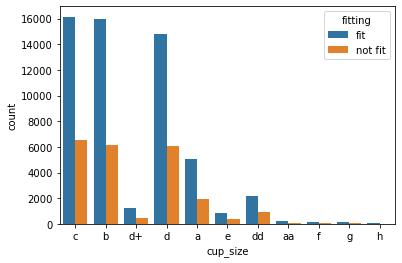

In [595]:
sns.countplot(x="cup_size", hue="fitting", data=clothes_df)
plt.show()

In [596]:
count_table2 = pd.crosstab(clothes_df["fitting"], clothes_df["cup_size"])
count_table

body type,apple,athletic,full bust,hourglass,pear,petite,straight & narrow
fitting,,,,,,,
fit,1598,13849,4627,17790,7262,7307,4468
not fit,636,5403,1946,6954,3018,2890,1729


In [597]:
print(stats.chisquare(count_table2, axis=None))

Power_divergenceResult(statistic=167297.7573511834, pvalue=0.0)


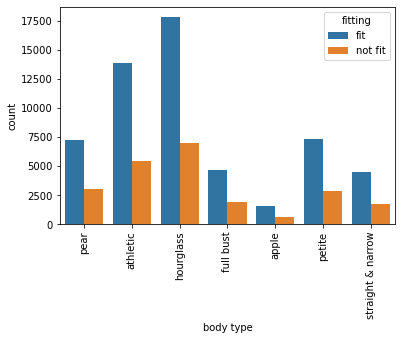

In [598]:
sns.countplot(x="body type", hue="fitting", data=clothes_df)
plt.xticks(rotation=90)
plt.show()

In [599]:
print(stats.chisquare(count_table, axis=None))

Power_divergenceResult(statistic=54490.7509468148, pvalue=0.0)


In [600]:
clothes_df.drop(columns='bust size', axis=1, inplace=True)
clothes_df.head()

,weight,rating,body type,size,age,fitting,height_cm,bust_line,cup_size
3,135,8.0,pear,2.079442,34,fit,165.10,34,c
5,138,8.0,athletic,2.079442,45,fit,172.72,32,b
6,112,10.0,hourglass,1.386294,27,fit,160.02,34,c
7,118,10.0,full bust,2.079442,65,fit,160.02,34,d+
10,135,8.0,athletic,2.484907,33,not fit,160.02,34,b


In [601]:
clothes_df.describe(include=['O'])

,body type,fitting,bust_line,cup_size
count,79477,79477,79477,79477
unique,7,2,11,11
top,hourglass,fit,34,c
freq,24744,56901,37537,22651


# Model Prep

In [602]:
clothes_df.corr()

,weight,rating,size,age,height_cm
weight,1.000000,-0.015818,0.591490,0.043702,0.337471
rating,-0.015818,1.000000,-0.032322,-0.030601,0.003042
size,0.591490,-0.032322,1.000000,0.130274,0.262982
age,0.043702,-0.030601,0.130274,1.000000,-0.018413
height_cm,0.337471,0.003042,0.262982,-0.018413,1.000000


In [603]:
clothes_df.shape

(79477, 9)

In [604]:
'''clothes_df['fitting'] = clothes_df['fitting'].replace('fit', 1)
clothes_df['fitting'] = clothes_df['fitting'].replace('not fit', 0)
'''


"clothes_df['fitting'] = clothes_df['fitting'].replace('fit', 1)\nclothes_df['fitting'] = clothes_df['fitting'].replace('not fit', 0)\n"

In [605]:
clothes_df.head()

,weight,rating,body type,size,age,fitting,height_cm,bust_line,cup_size
3,135,8.0,pear,2.079442,34,fit,165.10,34,c
5,138,8.0,athletic,2.079442,45,fit,172.72,32,b
6,112,10.0,hourglass,1.386294,27,fit,160.02,34,c
7,118,10.0,full bust,2.079442,65,fit,160.02,34,d+
10,135,8.0,athletic,2.484907,33,not fit,160.02,34,b


In [606]:
clothes_df = pd.concat([clothes_df, pd.get_dummies(clothes_df[["body type", "cup_size", "bust_line"]])], axis=1)
clothes_df.drop(columns=['body type', 'cup_size', 'bust_line'], axis=1, inplace=True)

In [607]:
def remove_correlated_features(dataset, threshold=0.70):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                if colname in dataset.columns:
                    print(f'Deleted {colname} from dataset.')
                    del dataset[colname]

    return dataset

clothes_df = remove_correlated_features(clothes_df)

# Models

In [608]:
clothes_df.head()

,weight,rating,size,age,fitting,height_cm,body type_apple,body type_athletic,body type_full bust,body type_hourglass,...,bust_line_30,bust_line_32,bust_line_34,bust_line_36,bust_line_38,bust_line_40,bust_line_42,bust_line_44,bust_line_46,bust_line_48
3,135,8.0,2.079442,34,fit,165.10,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,138,8.0,2.079442,45,fit,172.72,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
6,112,10.0,1.386294,27,fit,160.02,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
7,118,10.0,2.079442,65,fit,160.02,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
10,135,8.0,2.484907,33,not fit,160.02,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [609]:
clothes_df['fitting'] = clothes_df['fitting'].replace('fit', 0)
clothes_df['fitting'] = clothes_df['fitting'].replace('not fit', 1)

In [611]:
'''from sklearn.model_selection import train_test_split, cross_val_score


X = clothes_df.drop(columns='fitting', axis=1)
y = clothes_df['fitting']


from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2)'''

"from sklearn.model_selection import train_test_split, cross_val_score\n\n\nX = clothes_df.drop(columns='fitting', axis=1)\ny = clothes_df['fitting']\n\n\nfrom sklearn.preprocessing import StandardScaler\nX = StandardScaler().fit_transform(X)\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, \n                                                    test_size = 0.2)"

[2.45704710e-01 9.14002425e-02 1.42162930e-01 2.90977321e-01
 1.79224362e-01 2.19479043e-03 3.38221820e-03 2.09588818e-03
 3.43878933e-03 2.39185140e-03 2.24211843e-03 2.29122847e-03
 2.19142901e-03 6.74604984e-04 2.88300985e-03 4.18066708e-03
 3.46542448e-03 1.21952466e-03 2.06386438e-03 1.55762245e-03
 6.10484617e-04 5.68585710e-04 3.40299680e-04 2.81833422e-04
 9.26605727e-04 2.92301263e-03 3.48288289e-03 2.34524279e-03
 1.77066306e-03 5.26911443e-04 2.75571464e-04 1.42665771e-04
 3.13917480e-05 3.12523257e-05]


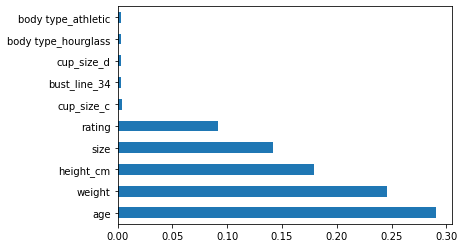

In [612]:
#import libraries
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
#Fit the model
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
#plot graph of feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [613]:
clothes_df = clothes_df[['age', 'weight', 'height_cm', 'rating', 'size', 'fitting']]
clothes_df['size'] = round(clothes_df['size']).astype(int)
clothes_df.head()

,age,weight,height_cm,rating,size,fitting
3,34,135,165.10,8.0,2,0
5,45,138,172.72,8.0,2,0
6,27,112,160.02,10.0,1,0
7,65,118,160.02,10.0,2,0
10,33,135,160.02,8.0,2,1


In [614]:
from sklearn.model_selection import train_test_split, cross_val_score


X = clothes_df.drop(columns='fitting', axis=1)
y = clothes_df['fitting']


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2)

In [615]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.7181051836940111

In [616]:
from sklearn.linear_model import LogisticRegression


lr_clf = LogisticRegression(solver='lbfgs', penalty='l2', C=6, max_iter=1000)
lr_cv_scores = cross_val_score(lr_clf, X_train, y_train, cv=5)

print('Accuracy scores for the 5 folds: ', lr_cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(lr_cv_scores)))

Accuracy scores for the 5 folds:  [0.72784462 0.72617175 0.72625039 0.7239698  0.7266436 ]
Mean cross validation score: 0.726


In [617]:
lr_clf.fit(X_train, y_train)

print(lr_clf.score(X_train, y_train))
print(lr_clf.score(X_test, y_test))

0.7262546987307529
0.7287367891293407


# Metrics

In [619]:
#imports

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report

In [620]:
predictions = lr_clf.predict(X_test)

confusion = confusion_matrix(y_test, predictions, labels=[0,1])
print(confusion)

[[10908   507]
 [ 3805   676]]


In [621]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Given a scikit-learn confusion matrix (CM), make a nice plot.

    Arguments
    ---------
    cm:           Confusion matrix from sklearn.metrics.confusion_matrix

    target_names: Given classification classes, such as [0, 1, 2]
                  The class names, for example, ['high', 'medium', 'low']

    title:        The text to display at the top of the matrix

    cmap:         The gradient of the values displayed from matplotlib.pyplot.cm
                  See http://matplotlib.org/examples/color/colormaps_reference.html
                  `plt.get_cmap('jet')` or `plt.cm.Blues`

    normalize:    If `False`, plot the raw numbers
                  If `True`, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # Confusion matrix created by
                                                              # `sklearn.metrics.confusion_matrix`
                          normalize    = True,                # Show proportions
                          target_names = y_labels_vals,       # List of names of the classes
                          title        = best_estimator_name) # Title of graph

    Citation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

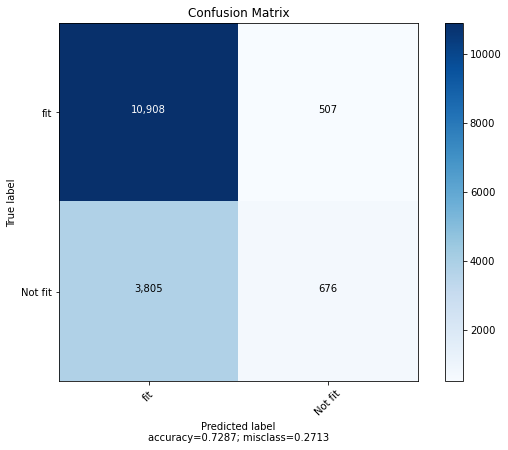

In [622]:
plot_confusion_matrix(cm=confusion, target_names = ['fit', 'Not fit'], title = 'Confusion Matrix',normalize=False)


In [624]:
report = classification_report(y_test, predictions, target_names=['fit', 'not fit'])
print(report)

              precision    recall  f1-score   support

         fit       0.74      0.96      0.83     11415
     not fit       0.57      0.15      0.24      4481

    accuracy                           0.73     15896
   macro avg       0.66      0.55      0.54     15896
weighted avg       0.69      0.73      0.67     15896



In [625]:
probs = lr_clf.predict_proba(X_test)[:, 1]
print(probs[1:30])

[0.21472013 0.69329796 0.20572568 0.21746595 0.20941409 0.19775931
 0.21079137 0.21781035 0.48446845 0.21946889 0.22115497 0.22578803
 0.37364648 0.62928326 0.36315942 0.22369356 0.22214828 0.23584618
 0.3337074  0.51583448 0.35977299 0.19263549 0.34224954 0.20229237
 0.35500881 0.3643603  0.34877629 0.22295295 0.21531227]


In [626]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

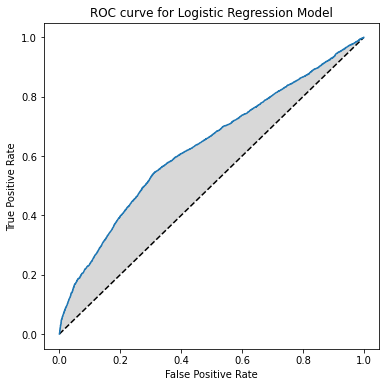

In [627]:
fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.fill(fpr, tpr, 'grey', alpha=0.3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression Model')
plt.show()

In [628]:
auc = roc_auc_score(y_test, probs)
print('Area under the ROC curve: {:.3f}'.format(auc))

Area under the ROC curve: 0.632


In [629]:
X_train_const = sm.add_constant(X_train)

sm_model = sm.Logit(y_train, X_train_const).fit()
print(sm_model.summary())

Optimization terminated successfully.
         Current function value: 0.570092
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                fitting   No. Observations:                63581
Model:                          Logit   Df Residuals:                    63575
Method:                           MLE   Df Model:                            5
Date:                Fri, 19 Feb 2021   Pseudo R-squ.:                 0.04546
Time:                        22:29:31   Log-Likelihood:                -36247.
converged:                       True   LL-Null:                       -37973.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2318      0.237     13.637      0.000       2.767       3.696
age           -0.0078      0.

## Random Forest

In [637]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=8, random_state=21)
rf_clf.fit(X_train, y_train)

rf_cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=5)
print(rf_cv_scores)

print('Accuracy scores for the 5 folds: ', rf_cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(rf_cv_scores)))
print(rf_clf.score(X_test, y_test))
print(rf_clf.score(X_test, y_test))

[0.72792325 0.72656496 0.72687952 0.72302611 0.72593583]
Accuracy scores for the 5 folds:  [0.72792325 0.72656496 0.72687952 0.72302611 0.72593583]
Mean cross validation score: 0.726
0.7298691494715652
0.7298691494715652


In [631]:
from sklearn.metrics import confusion_matrix
predictions = rf_clf.predict(X_test)

confusion = confusion_matrix(y_test, predictions)
print(confusion)

report = classification_report(y_test, predictions)
print(report)

[[10958   457]
 [ 3837   644]]
              precision    recall  f1-score   support

           0       0.74      0.96      0.84     11415
           1       0.58      0.14      0.23      4481

    accuracy                           0.73     15896
   macro avg       0.66      0.55      0.53     15896
weighted avg       0.70      0.73      0.67     15896



## KNN

In [634]:
from sklearn.neighbors import KNeighborsClassifier



from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

# Build the model
knn = KNeighborsClassifier(n_neighbors=13)
knn_cv_scores = cross_val_score(knn, X_train, y_train, cv=5)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [635]:
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.7394819206995801
0.7135128334172118


In [636]:
from sklearn.metrics import confusion_matrix
predictions = knn.predict(X_test)

confusion = confusion_matrix(y_test, predictions)
print(confusion)

report = classification_report(y_test, predictions)
print(report)

[[10723   692]
 [ 3862   619]]
              precision    recall  f1-score   support

           0       0.74      0.94      0.82     11415
           1       0.47      0.14      0.21      4481

    accuracy                           0.71     15896
   macro avg       0.60      0.54      0.52     15896
weighted avg       0.66      0.71      0.65     15896

